# Implementation of LSTM on GME 1min data

## 1. importing required packages

In [11]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

## 2. importing stock data using yahoo! finance API

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Datetime'>

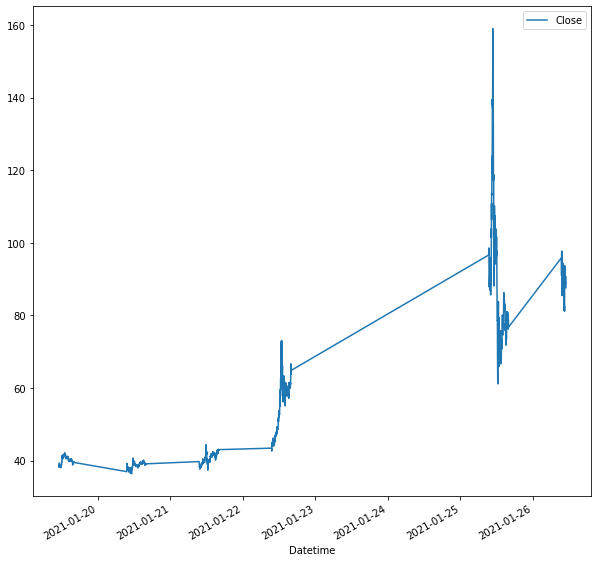

In [26]:
data = yf.download('GME', start = '2021-01-20', interval = '1m', end = '2021-01-27')[['Close']]
data.head()
  
data.plot(figsize = (10, 10))

In [27]:
data.tail()

,Close
Datetime,
2021-01-26 10:55:00-05:00,89.730003
2021-01-26 10:56:00-05:00,88.650101
2021-01-26 10:57:00-05:00,89.040001
2021-01-26 10:58:00-05:00,88.095100
2021-01-26 10:59:00-05:00,87.610100


## 3. preparing dataset with 60:40 train-to-test ratio

In [28]:
prop_train = 0.6

cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*prop_train)]
scl = MinMaxScaler()

In [29]:
scl.fit(train.values.reshape(-1,1))
cl = scl.transform(cl.values.reshape(-1,1))

In [41]:
def processData(data, lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb), 0])
        Y.append(data[(i+lb), 0])
    return np.array(X), np.array(Y)
 
 
lb = 60
X, y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*prop_train)], X[int(X.shape[0]*prop_train):]
y_train,y_test = y[:int(y.shape[0]*prop_train)], y[int(y.shape[0]*prop_train):]
print(X.shape[0], X.shape[1])
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

1812 60
1087 60
725 60
1087
725


In [35]:
print(X.shape[1])

60


## 4. train the model, look back window = 20

In [42]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/100
34/34 [==============================] - 7s 143ms/step - loss: 0.0414 - val_loss: 3.1465
Epoch 2/100
34/34 [==============================] - 4s 127ms/step - loss: 0.0059 - val_loss: 2.8494
Epoch 3/100
34/34 [==============================] - 4s 128ms/step - loss: 0.0054 - val_loss: 3.2951
Epoch 4/100
34/34 [==============================] - 4s 130ms/step - loss: 0.0067 - val_loss: 3.9493
Epoch 5/100
34/34 [==============================] - 4s 132ms/step - loss: 0.0090 - val_loss: 4.2729
Epoch 6/100
34/34 [==============================] - 4s 125ms/step - loss: 0.0116 - val_loss: 4.6722
Epoch 7/100
34/34 [==============================] - 4s 128ms/step - loss: 0.0176 - val_loss: 5.0453
Epoch 8/100
34/34 [==============================] - 4s 133ms/step - loss: 0.0192 - val_loss: 5.5424
Epoch 9/100
34/34 [==============================] - 4s 127ms/step - loss: 0.0176 - val_loss: 5.7961
Epoch 10/100
34/34 [==============================] - 4s 128ms/step - loss: 0.0141 - val_lo

## 5. validation

Text(0.5, 1.0, 'validation on testing data')

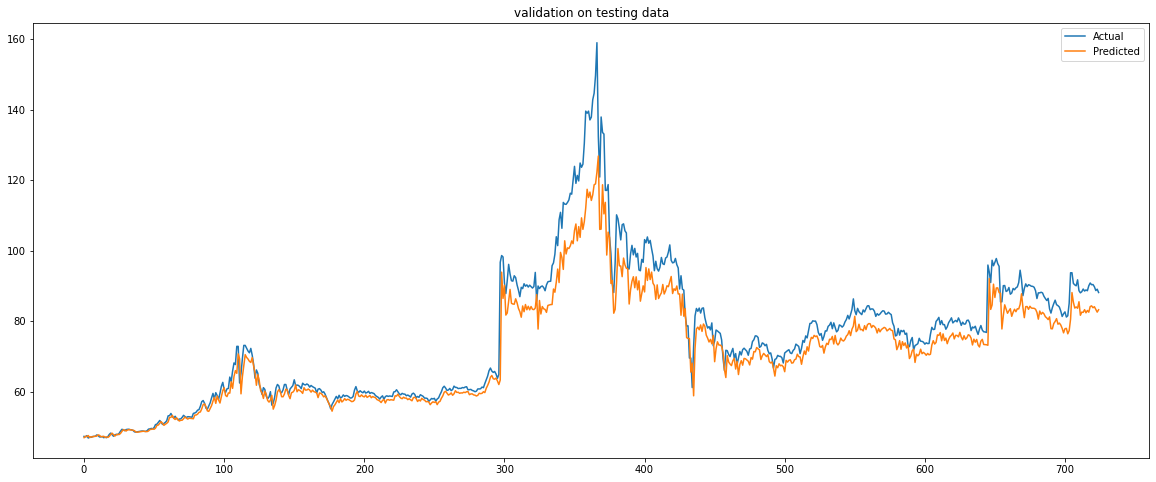

In [43]:
plt.figure(figsize=(20,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("validation on testing data")

Text(0.5, 1.0, 'Full Prediction')

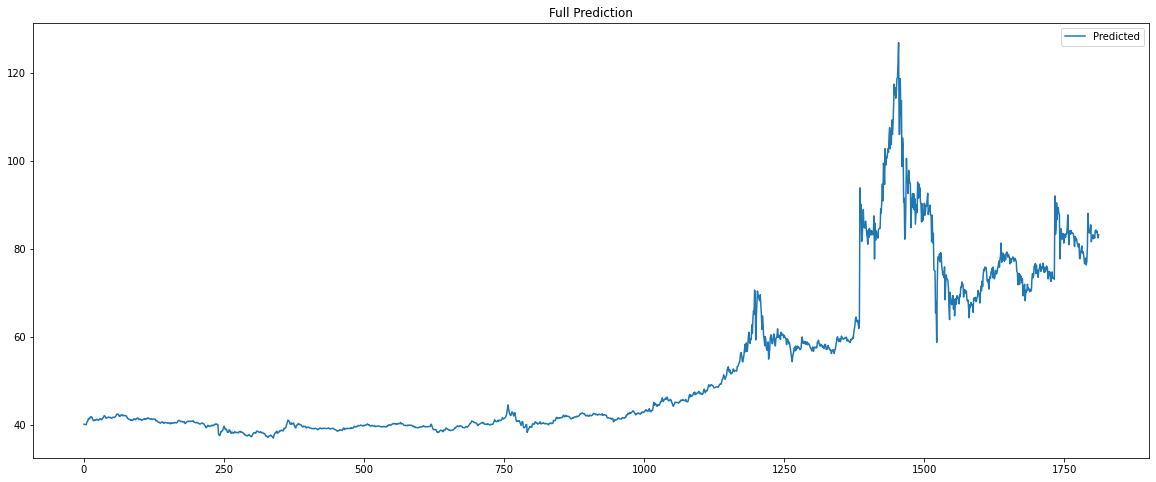

In [44]:
X = X.reshape((X.shape[0],X.shape[1],1))

plt.figure(figsize=(20,8))
Xp = model.predict(X)
plt.plot(scl.inverse_transform(Xp), label="Predicted")
plt.legend()
plt.title("Full Prediction")

## 6. credit

### Source: 
> https://datamahadev.com/how-can-you-use-lstm-for-stock-market-prediction/<br>
> https://predictivehacks.com/predict-stock-prices-with-lstm/